In [1]:
import pandas as pd, numpy as np
import nltk, re
from string import punctuation
from collections import Counter
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

%ls

import text_mining_utils as tmu

data = pd.read_csv('tripadvisor_hotel_reviews.csv')

data.sample(3)

 Volume in drive C is Acer
 Volume Serial Number is 4E51-463B

 Directory of c:\Users\paulj\OneDrive\Desktop\TextAnalyticsAssignment

06/04/2024  01:31    <DIR>          .
04/04/2024  18:41    <DIR>          ..
08/04/2024  21:36    <DIR>          __pycache__
19/03/2024  11:04           161,661 PeerReview.pdf
08/04/2024  20:55            15,571 text_mining_utils.py
19/03/2024  11:04            35,199 TextAnalysis_PeerReview_Template.docx
28/02/2024  10:07           160,315 TextAnalyticsAssessment2024.pdf
06/04/2024  01:31         2,017,433 TextAnalyticsAssignment.docx
08/04/2024  22:50         1,353,640 TextAnalyticsAssignment.ipynb
28/02/2024  11:49        14,966,021 tripadvisor_hotel_reviews.csv
               7 File(s)     18,709,840 bytes
               3 Dir(s)  86,209,208,320 bytes free


,Review,Rating
19335,"amazing, n't understand negative reviews, thou...",5
14450,"fabulous hotel fantastic little hotel, conveni...",5
8693,welcoming hotel great location friendly staff ...,4


In [2]:
clf = MultinomialNB()
y = data.Rating

baseline_count_matrix = tmu.build_count_matrix(data.Review)
baseline_count_matrix.head()

,',*,+,",",-,.,/,0,0'8,00,...,é_Çål,éenny,êtyle,î_,î__asically,î__ere,î__here,î__hese,î_ölthough,öreat
0,0,0,0,11,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,20,1,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,16,0,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,13,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,33,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
baseline_tf_matrix = tmu.build_tf_matrix(data.Review)
baseline_tf_matrix.head()

,',*,+,",",-,.,/,0,0'8,00,...,é_Çål,éenny,êtyle,î_,î__asically,î__ere,î__here,î__hese,î_ölthough,öreat
0,0.0,0.000,0.0,0.110000,0.010000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000,0.0,0.070922,0.003546,0.014184,0.003546,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.008,0.0,0.064000,0.000000,0.028000,0.004000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000,0.0,0.125000,0.000000,0.000000,0.009615,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000,0.0,0.146667,0.000000,0.004444,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
baseline_tfidf_matrix = tmu.build_tfidf_matrix(data.Review)
baseline_tfidf_matrix.head()

,',*,+,",",-,.,/,0,0'8,00,...,é_Çål,éenny,êtyle,î_,î__asically,î__ere,î__here,î__hese,î_ölthough,öreat
0,0.0,0.000000,0.0,0.259180,0.046176,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.208208,0.020402,0.062704,0.026245,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.113073,0.0,0.172938,0.000000,0.113930,0.027249,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.251560,0.000000,0.000000,0.048785,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.389064,0.000000,0.017753,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
tmu.printClassifReport(clf, baseline_count_matrix, y)
tmu.printClassifReport(clf, baseline_tf_matrix, y)
tmu.printClassifReport(clf, baseline_tfidf_matrix, y)

In [ ]:
from sklearn.model_selection import cross_val_score

clf_count = MultinomialNB()
clf_tf = MultinomialNB()
clf_tfidf = MultinomialNB()

scores_count = cross_val_score(clf_count, baseline_count_matrix, y, cv=5) 
scores_tf = cross_val_score(clf_tf, baseline_tf_matrix, y, cv=5)
scores_tfidf = cross_val_score(clf_tfidf, baseline_tfidf_matrix, y, cv=5)

print("Count Matrix:")
print("Accuracy:", scores_count.mean())
print("Standard Deviation:", scores_count.std())

print("\nTF Matrix:")
print("Accuracy:", scores_tf.mean())
print("Standard Deviation:", scores_tf.std())

print("\nTF-IDF Matrix:")
print("Accuracy:", scores_tfidf.mean())
print("Standard Deviation:", scores_tfidf.std())

Count Matrix:
Accuracy: 0.5654181149302446
Standard Deviation: 0.012990277777493908

TF Matrix:
Accuracy: 0.4418525343526157
Standard Deviation: 0.00014070972327049348

TF-IDF Matrix:
Accuracy: 0.44336538414599813
Standard Deviation: 0.00016028317569423002


In [6]:
from text_mining_utils import print_n_mostFrequent

one_star_reviews = ' '.join(data[data['Rating'] == 1]['Review'])
two_star_reviews = ' '.join(data[data['Rating'] == 2]['Review'])
three_star_reviews = ' '.join(data[data['Rating'] == 3]['Review'])
four_star_reviews = ' '.join(data[data['Rating'] == 4]['Review'])
five_star_reviews = ' '.join(data[data['Rating'] == 5]['Review'])

print_n_mostFrequent("1-star", one_star_reviews, 10)
print_n_mostFrequent("2-star", two_star_reviews, 10)
print_n_mostFrequent("3-star", three_star_reviews, 10)
print_n_mostFrequent("4-star", four_star_reviews, 10)
print_n_mostFrequent("5-star", five_star_reviews, 10)

=== 10 most frequent tokens in 1-star ===
	Frequency of "," is: 0.10230332540501728
	Frequency of "not" is: 0.02122133464973298
	Frequency of "hotel" is: 0.020133061077951802
	Frequency of "room" is: 0.01834918996544451
	Frequency of "n't" is: 0.00939056679980254
	Frequency of "no" is: 0.008823991383565948
	Frequency of "did" is: 0.007359870753489207
	Frequency of "stay" is: 0.00677085670690661
	Frequency of "staff" is: 0.005385271283040883
	Frequency of "rooms" is: 0.005020643539918324
=== 10 most frequent tokens in 2-star ===
	Frequency of "," is: 0.1006741910497779
	Frequency of "not" is: 0.020609064036294082
	Frequency of "room" is: 0.016807353661813757
	Frequency of "hotel" is: 0.01649120311092142
	Frequency of "n't" is: 0.009322489369437727
	Frequency of "no" is: 0.00782472613458529
	Frequency of "did" is: 0.007216136324117545
	Frequency of "good" is: 0.005876448364711275
	Frequency of "stay" is: 0.005402222538372773
	Frequency of "rooms" is: 0.005354799955738923
=== 10 most freq

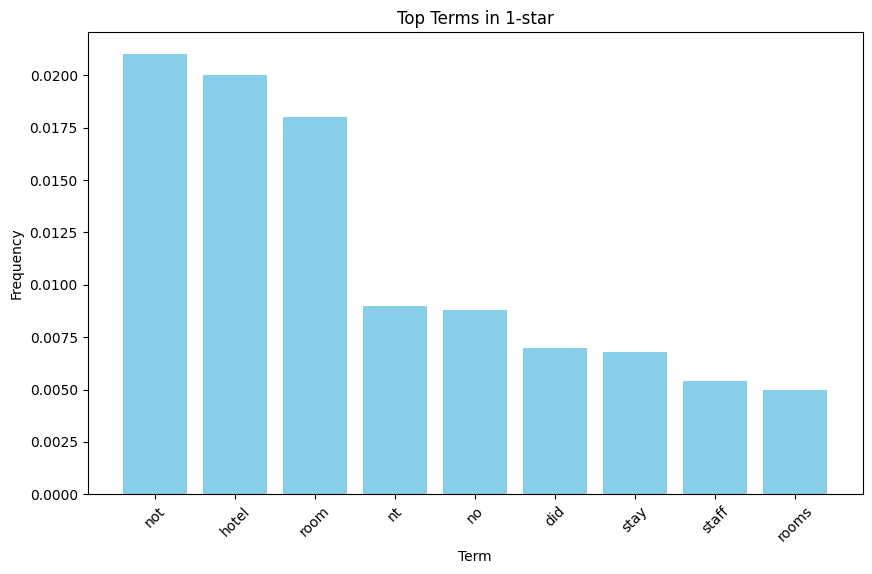

In [ ]:
def plot_bar_chart(category, top_terms):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(top_terms)), top_terms.values(), align='center', color='skyblue')
    plt.xticks(range(len(top_terms)), top_terms.keys(), rotation=45)
    plt.ylabel('Frequency')
    plt.xlabel('Term')
    plt.title(f'Top Terms in {category}')
    plt.show()

category = '1-star'
top_terms = { 'not': 0.021, 'hotel': 0.020, 'room': 0.018, 'nt': 0.009, 'no': 0.0088, 'did': 0.007, 'stay': 0.0068, 'staff': 0.0054, 'rooms': 0.005}

plot_bar_chart(category, top_terms)

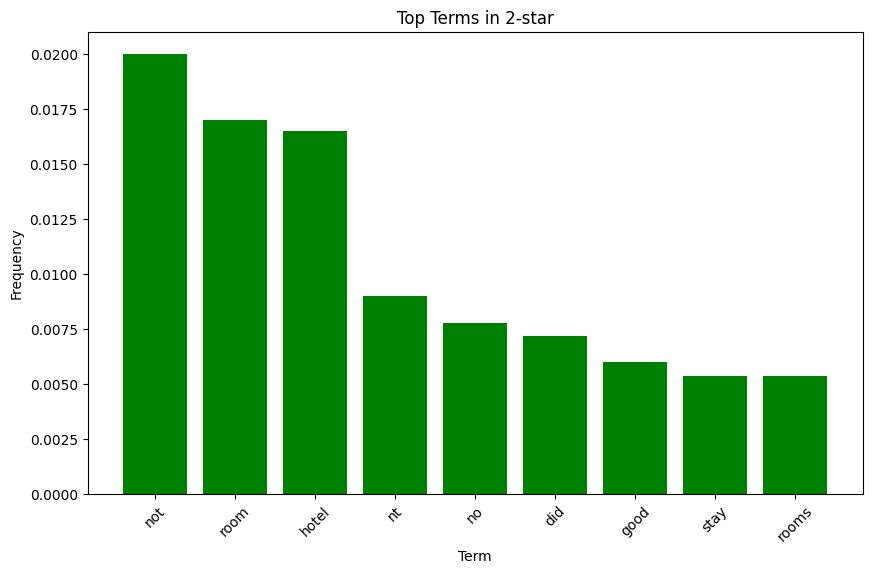

In [ ]:
def plot_bar_chart(category, top_terms):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(top_terms)), top_terms.values(), align='center', color='green')
    plt.xticks(range(len(top_terms)), top_terms.keys(), rotation=45)
    plt.ylabel('Frequency')
    plt.xlabel('Term')
    plt.title(f'Top Terms in {category}')
    plt.show()

category = '2-star'
top_terms = { 'not': 0.02, 'room': 0.017, 'hotel': 0.0165, 'nt': 0.009, 'no': 0.0078, 'did': 0.0072, 'good': 0.006, 'stay': 0.0054, 'rooms': 0.0054}

plot_bar_chart(category, top_terms)

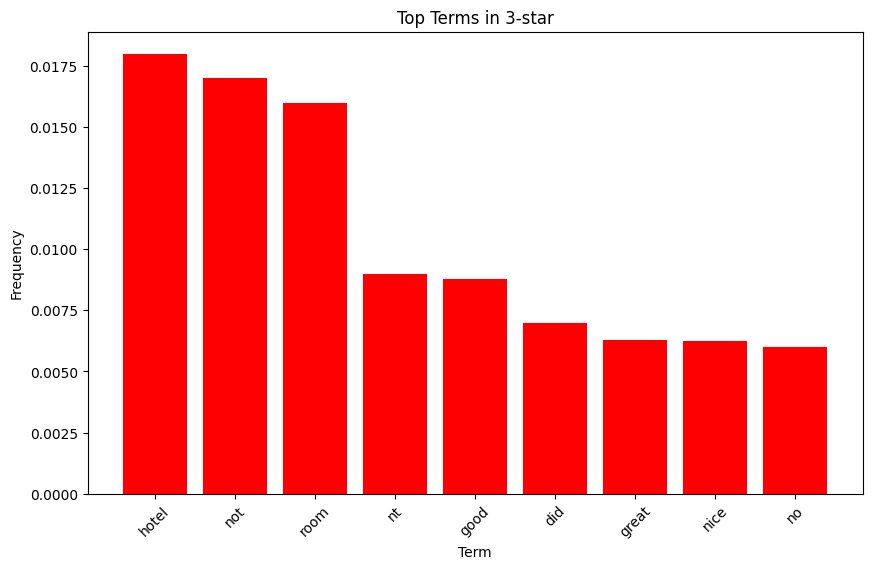

In [ ]:
def plot_bar_chart(category, top_terms):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(top_terms)), top_terms.values(), align='center', color='red')
    plt.xticks(range(len(top_terms)), top_terms.keys(), rotation=45)
    plt.ylabel('Frequency')
    plt.xlabel('Term')
    plt.title(f'Top Terms in {category}')
    plt.show()

category = '3-star'
top_terms = { 'hotel': 0.018, 'not': 0.017, 'room': 0.016, 'nt': 0.009, 'good': 0.0088, 'did': 0.007, 'great': 0.00627, 'nice': 0.00624, 'no': 0.006}

plot_bar_chart(category, top_terms)

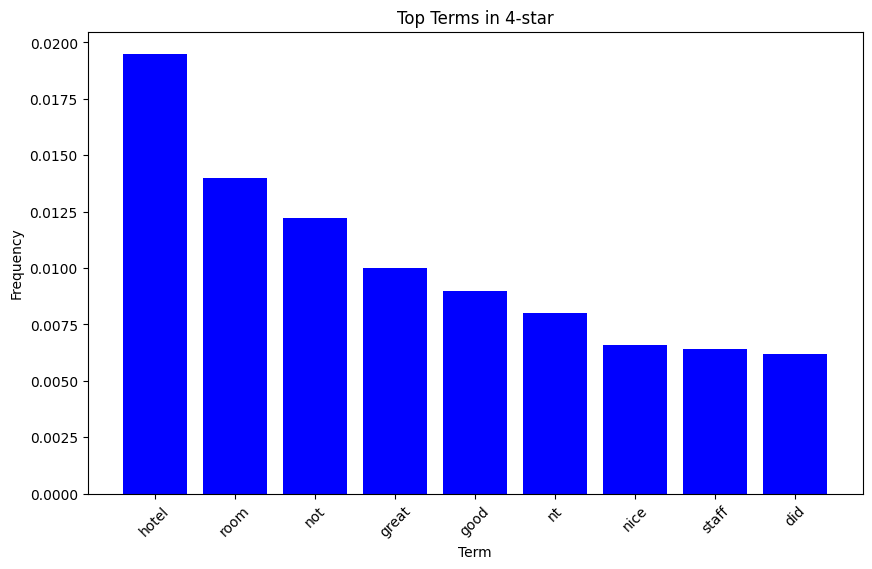

In [ ]:
def plot_bar_chart(category, top_terms):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(top_terms)), top_terms.values(), align='center', color='blue')
    plt.xticks(range(len(top_terms)), top_terms.keys(), rotation=45)
    plt.ylabel('Frequency')
    plt.xlabel('Term')
    plt.title(f'Top Terms in {category}')
    plt.show()

category = '4-star'
top_terms = {'hotel': 0.0195, 'room': 0.014, 'not': 0.0122, 'great': 0.01, 'good': 0.009, 'nt': 0.008, 'nice': 0.0066, 'staff': 0.0064, 'did': 0.0062}

plot_bar_chart(category, top_terms)

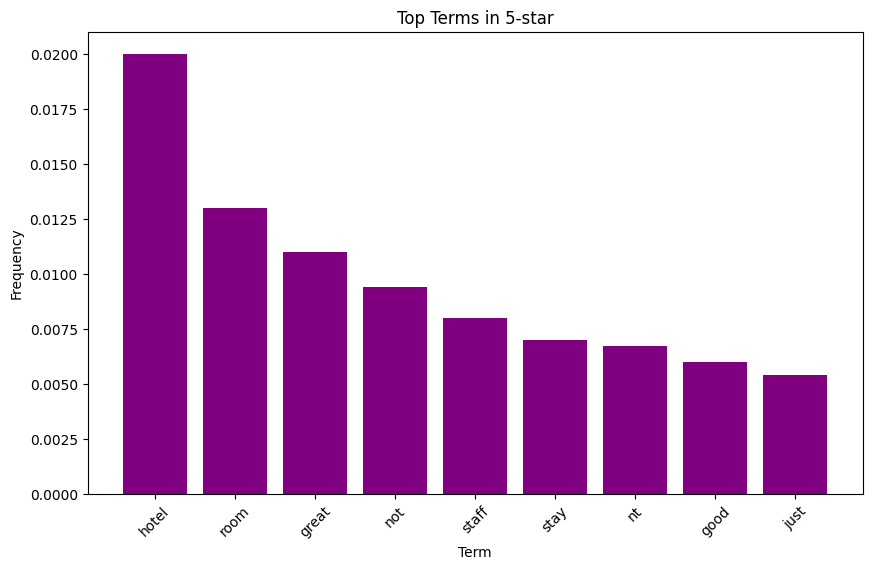

In [ ]:
def plot_bar_chart(category, top_terms):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(top_terms)), top_terms.values(), align='center', color='purple')
    plt.xticks(range(len(top_terms)), top_terms.keys(), rotation=45)
    plt.ylabel('Frequency')
    plt.xlabel('Term')
    plt.title(f'Top Terms in {category}')
    plt.show()

category = '5-star'
top_terms = {'hotel': 0.02, 'room': 0.013, 'great': 0.011, 'not': 0.0094, 'staff': 0.008, 'stay': 0.007, 'nt': 0.0067, 'good': 0.006, 'just': 0.0054}

plot_bar_chart(category, top_terms)

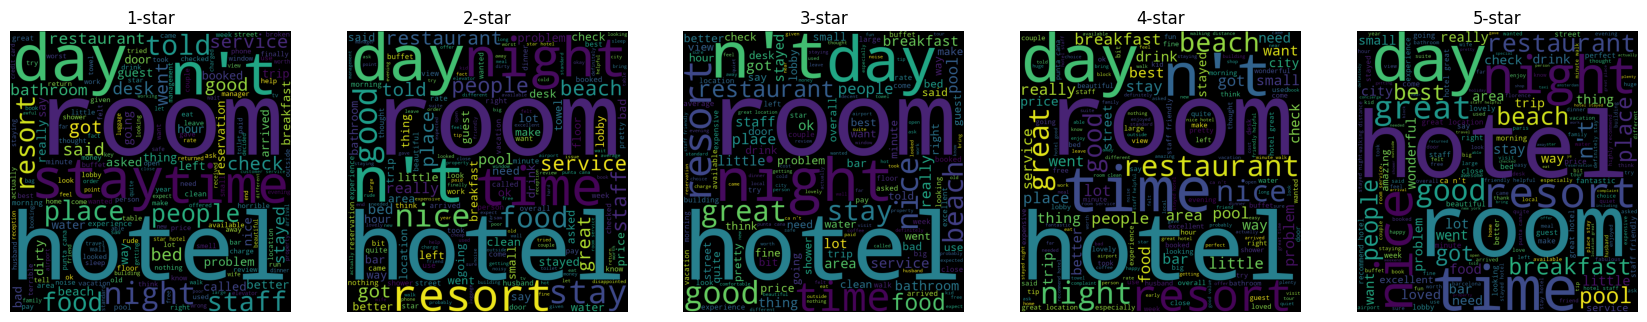

In [12]:
tmu.generate_wordclouds([one_star_reviews, two_star_reviews, three_star_reviews, four_star_reviews, five_star_reviews],
['1-star', '2-star', '3-star', '4-star', '5-star'],
'black')

In [3]:
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

sims = cosine_similarity(baseline_tfidf_matrix)

NameError: name 'tmu' is not defined

In [14]:
dists = cosine_distances(baseline_tfidf_matrix)

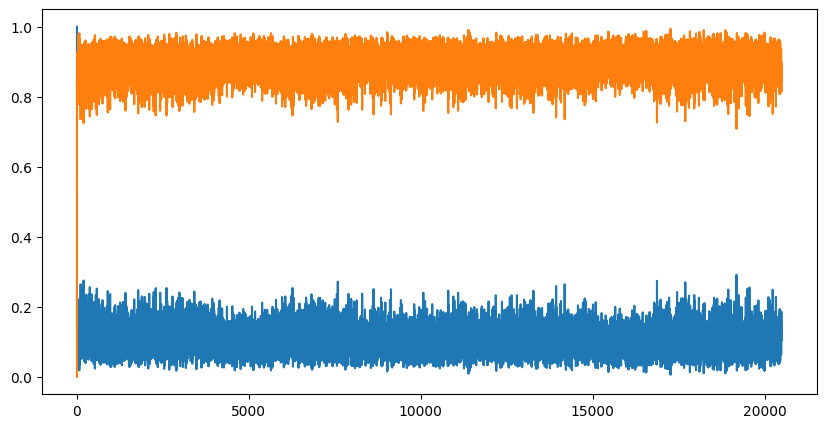

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(sims[0])
plt.plot(dists[0])

[4, 2, 3, 5, 5, 5, 5, 4, 5, 5, 2, 4, 4, 3, 4, 1, 2, 5, 5, 3, 5, 5, 4, 5, 2, 3, 4, 3, 4, 4, 4, 4, 1, 2, 4, 4, 4, 5, 4, 4, 1, 4, 2, 4, 2, 2, 3, 3, 5, 5, 5, 4, 5, 5, 3, 5, 3, 5, 5, 5, 4, 5, 5, 5, 4, 1, 5, 3, 3, 1, 4, 2, 5, 5, 4, 5, 1, 1, 4, 2, 2, 5, 5, 2, 4, 4, 5, 4, 1, 4, 4, 5, 1, 4, 4, 4, 4, 1, 3, 1, 3, 1, 5, 3, 3, 4, 4, 5, 5, 3, 4, 5, 4, 4, 5, 4, 5, 5, 4, 4, 4, 5, 4, 5, 4, 5, 3, 5, 4, 4, 3, 4, 4, 3, 1, 3, 3, 4, 3, 3, 1, 1, 3, 4, 3, 4, 4, 5, 5, 5, 4, 5, 5, 1, 3, 2, 1, 5, 2, 4, 1, 5, 3, 2, 4, 3, 2, 4, 3, 4, 4, 3, 4, 4, 1, 4, 1, 4, 4, 2, 4, 1, 2, 4, 5, 5, 4, 3, 3, 2, 2, 2, 2, 4, 3, 4, 1, 1, 5, 3, 1, 3, 2, 5, 4, 4, 3, 2, 3, 3, 2, 1, 5, 5, 4, 3, 4, 4, 5, 3, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 4, 1, 5, 2, 3, 4, 4, 4, 3, 4, 5, 4, 4, 1, 5, 4, 5, 5, 2, 3, 2, 4, 3, 3, 4, 1, 3, 1, 4, 2, 4, 2, 2, 4, 3, 2, 5, 5, 3, 2, 5, 5, 5, 4, 4, 4, 4, 4, 5, 5, 4, 4, 3, 2, 4, 2, 5, 5, 5, 4, 2, 4, 1, 4, 1, 4, 1, 4, 5, 3, 2, 5, 2, 5, 5, 5, 4, 5, 3, 3, 1, 1, 2, 5, 5, 4, 5, 4, 3, 5, 2, 2, 3, 1, 5, 4, 3, 1, 3, 5, 1, 4, 2, 

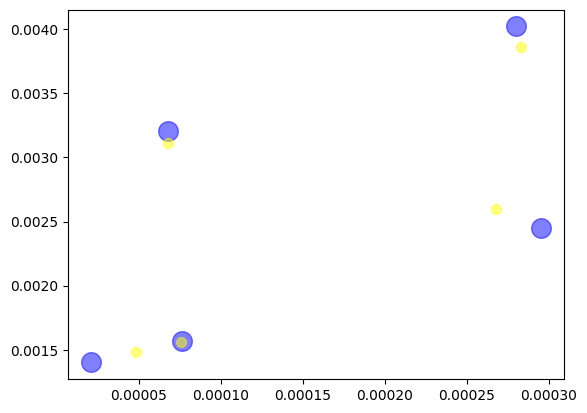

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix

if not isinstance(baseline_tfidf_matrix, csr_matrix):
    baseline_tfidf_matrix = csr_matrix(baseline_tfidf_matrix)

k = 5
kmeans_r = KMeans(n_clusters=k, init='random', n_init=1)
cluster_labels_r = kmeans_r.fit_predict(baseline_tfidf_matrix)
cluster_centers_r = kmeans_r.cluster_centers_

print(list(y))
print(cluster_labels_r)
plt.scatter(cluster_centers_r[:, 0], cluster_centers_r[:, 1], c='blue', s=200, alpha=0.5)

kmeans_p = KMeans(n_clusters=k, init='k-means++', n_init=1)
cluster_labels_p = kmeans_p.fit_predict(baseline_tfidf_matrix)
cluster_centers_p = kmeans_p.cluster_centers_

print(list(y))
print(cluster_labels_p)
plt.scatter(cluster_centers_p[:, 0], cluster_centers_p[:, 1], c='yellow', s=50, alpha=0.5)

plt.show()

In [7]:
if not isinstance(baseline_count_matrix, csr_matrix):
    baseline_count_matrix = csr_matrix(baseline_count_matrix)

k = 5
kmeans_a = KMeans(n_clusters=k, init='random', n_init=1)
cluster_labels_a = kmeans_a.fit_predict(baseline_count_matrix)
cluster_centers_a = kmeans_a.cluster_centers_

kmeans_b = KMeans(n_clusters=k, init='k-means++', n_init=1)
cluster_labels_b = kmeans_b.fit_predict(baseline_tfidf_matrix)
cluster_centers_b = kmeans_b.cluster_centers_

In [8]:
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
print("Kmeans Random - ARI score:",
      adjusted_rand_score(cluster_labels_a, list(y)))
print("Kmeans++ - ARI score:",
      adjusted_rand_score(cluster_labels_b, list(y)))
print("Kmeans Random - FMI score:",
      fowlkes_mallows_score(cluster_labels_a, list(y)))
print("Kmeans++ - FMI score:",
      fowlkes_mallows_score(cluster_labels_b, list(y)))


Kmeans Random - ARI score: 0.029558816302968322
Kmeans++ - ARI score: 0.02265990242657483
Kmeans Random - FMI score: 0.3885298963918797
Kmeans++ - FMI score: 0.27283124658880653


In [9]:
if not isinstance(baseline_count_matrix, csr_matrix):
    baseline_count_matrix = csr_matrix(baseline_count_matrix)

k = 5
kmeans_c = KMeans(n_clusters=k, init='random', n_init=1)
cluster_labels_c = kmeans_c.fit_predict(baseline_count_matrix)
cluster_centers_c = kmeans_c.cluster_centers_

kmeans_d = KMeans(n_clusters=k, init='k-means++', n_init=1)
cluster_labels_d = kmeans_d.fit_predict(baseline_tfidf_matrix)
cluster_centers_d = kmeans_d.cluster_centers_

print("Kmeans Random - ARI score:",
      adjusted_rand_score(cluster_labels_c, list(y)))
print("Kmeans++ - ARI score:",
      adjusted_rand_score(cluster_labels_d, list(y)))
print("Kmeans Random - FMI score:",
      fowlkes_mallows_score(cluster_labels_c, list(y)))
print("Kmeans++ - FMI score:",
      fowlkes_mallows_score(cluster_labels_d, list(y)))

Kmeans Random - ARI score: 0.029558816302968322
Kmeans++ - ARI score: 0.04951890169281927
Kmeans Random - FMI score: 0.3885298963918797
Kmeans++ - FMI score: 0.3278407245838103


In [10]:
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

print("Kmeans Random - ARI score:",
      adjusted_rand_score(cluster_labels_r, list(y)))
print("Kmeans++ - ARI score:",
      adjusted_rand_score(cluster_labels_p, list(y)))
print("Kmeans Random - FMI score:",
      fowlkes_mallows_score(cluster_labels_r, list(y)))
print("Kmeans++ - FMI score:",
      fowlkes_mallows_score(cluster_labels_p, list(y)))

Kmeans Random - ARI score: 0.022344380439830197
Kmeans++ - ARI score: 0.02436302395692028
Kmeans Random - FMI score: 0.272860084259463
Kmeans++ - FMI score: 0.27450133411795113


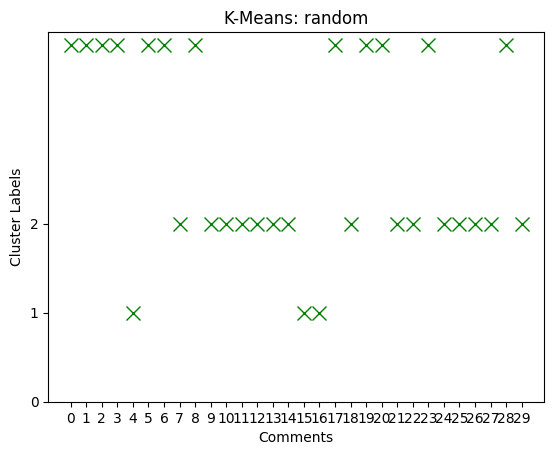

In [16]:
num_terms = baseline_count_matrix.shape[1]
baseline_count_matrix_df = pd.DataFrame(baseline_count_matrix[:30].todense(), columns=[f'term_{i+1}' for i in range(num_terms)])

tmu.plot_clusters(baseline_count_matrix_df, cluster_labels_a[:30], "K-Means: random", 'Comments', 'Cluster Labels')

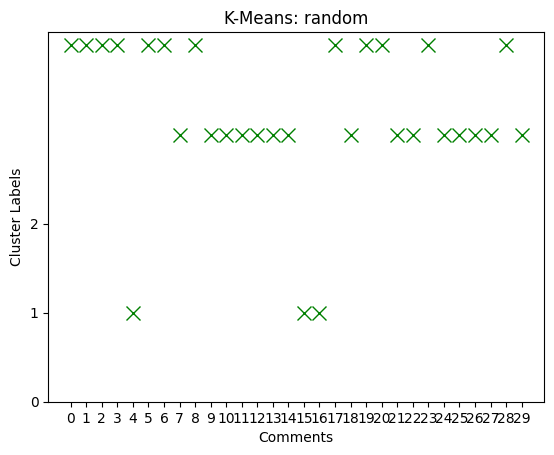

In [17]:
num_terms = baseline_tf_matrix.shape[1]
baseline_tf_matrix_df = pd.DataFrame(baseline_tf_matrix[:30], columns=[f'term_{i+1}' for i in range(num_terms)])

tmu.plot_clusters(baseline_tf_matrix_df, cluster_labels_c[:30], "K-Means: random", 'Comments', 'Cluster Labels')

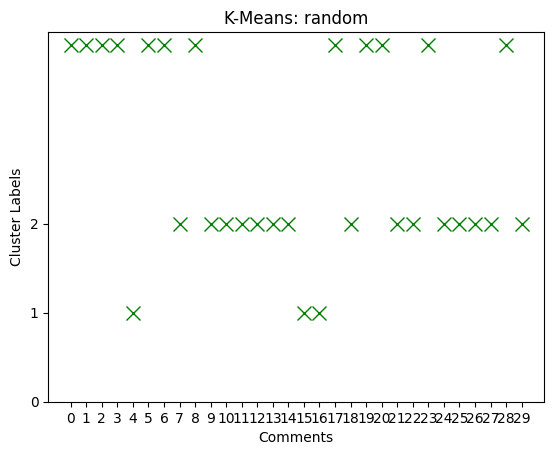

In [26]:
num_terms = baseline_tfidf_matrix.shape[1]
baseline_tfidf_matrix_df = pd.DataFrame(baseline_tfidf_matrix[:30].todense(), columns=[f'term_{i+1}' for i in range(num_terms)])

tmu.plot_clusters(baseline_tfidf_matrix_df, cluster_labels_a[:30], "K-Means: random", 'Comments', 'Cluster Labels')

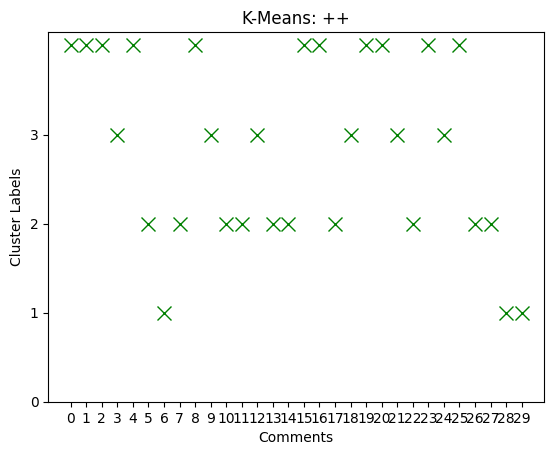

In [25]:
num_terms = baseline_count_matrix.shape[1]
baseline_count_matrix_df = pd.DataFrame(baseline_count_matrix[:30].todense(), columns=[f'term_{i+1}' for i in range(num_terms)])

tmu.plot_clusters(baseline_count_matrix_df, cluster_labels_b[:30], "K-Means: ++", 'Comments', 'Cluster Labels')

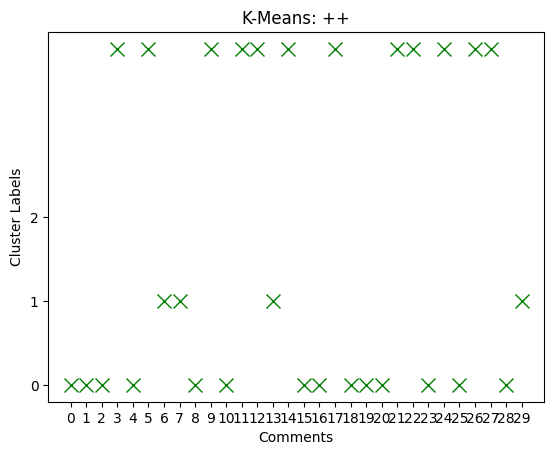

In [27]:
num_terms = baseline_tf_matrix.shape[1]
baseline_tf_matrix_df = pd.DataFrame(baseline_tf_matrix[:30], columns=[f'term_{i+1}' for i in range(num_terms)])

tmu.plot_clusters(baseline_tf_matrix_df, cluster_labels_d[:30], "K-Means: ++", 'Comments', 'Cluster Labels')

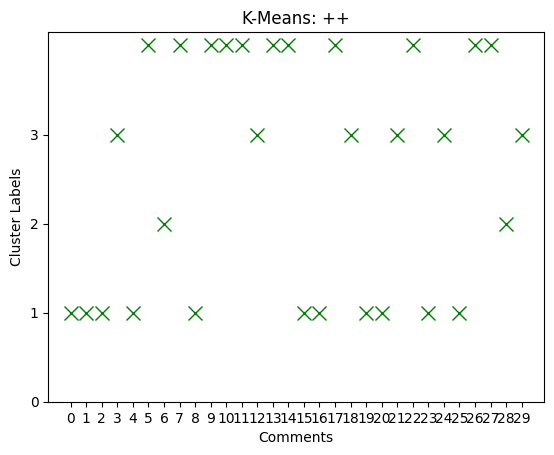

In [28]:
num_terms = baseline_tfidf_matrix.shape[1]
baseline_tfidf_matrix_df = pd.DataFrame(baseline_tfidf_matrix[:30].todense(), columns=[f'term_{i+1}' for i in range(num_terms)])

tmu.plot_clusters(baseline_tfidf_matrix_df, cluster_labels_p[:30], "K-Means: ++", 'Comments', 'Cluster Labels')

In [3]:
clean_operations = {
r'(\(.+?\))+' : '', 
r'(\[.+?\])+' : '', 
r'\s+' : ' ', 
r'\s{2,}' : ' ', 
}
clean_data = data.copy()
clean_data.Review = clean_data.Review.apply(tmu.clean_doc, clean_operations=clean_operations)
clean_data.head()

clean_count_matrix = tmu.build_count_matrix(clean_data.Review)
clean_tf_matrix = tmu.build_tf_matrix(clean_data.Review)
clean_tfidf_matrix = tmu.build_tfidf_matrix(clean_data.Review)

In [ ]:
tmu.printClassifReport(clf, clean_count_matrix, y)
tmu.printClassifReport(clf, clean_tf_matrix, y)
tmu.printClassifReport(clf, clean_tfidf_matrix, y)

In [7]:
repl_dict = {
'room': [r'\broom(s)\b', r'\bhotelroom\b' r'\bbedroom?\b'],
'hotel': [r'\bhotel\b', r'\bresort\b'],
'good': [r'\bgood?\b', r'\bgreat?\b', r'\bnice?\b']
}

docs = clean_data.Review
docs_repl = docs.apply(tmu.improve_bow, repl_dict=repl_dict)

new_count_matrix = tmu.build_count_matrix(docs_repl)
new_tf_matrix = tmu.build_tf_matrix(docs_repl)
new_tfidf_matrix = tmu.build_tfidf_matrix(docs_repl)

print(new_count_matrix.head(1))
print(new_tf_matrix.head(1))
new_tfidf_matrix.head(1)

   '  *  +   ,  -  .  /  0  0'8  00  ...  é_Çål  éenny  êtyle  î_  \
0  0  0  0  11  1  0  0  0    0   0  ...      0      0      0   0   

   î__asically  î__ere  î__here  î__hese  î_ölthough  öreat  
0            0       0        0        0           0      0  

[1 rows x 53224 columns]
     '    *    +     ,     -    .    /    0  0'8   00  ...  é_Çål  éenny  \
0  0.0  0.0  0.0  0.11  0.01  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

   êtyle   î_  î__asically  î__ere  î__here  î__hese  î_ölthough  öreat  
0    0.0  0.0          0.0     0.0      0.0      0.0         0.0    0.0  

[1 rows x 53224 columns]


,',*,+,",",-,.,/,0,0'8,00,...,é_Çål,éenny,êtyle,î_,î__asically,î__ere,î__here,î__hese,î_ölthough,öreat
0,0.0,0.0,0.0,0.262091,0.046694,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
tmu.printClassifReport(clf, new_count_matrix, y)
tmu.printClassifReport(clf, new_tf_matrix, y)
tmu.printClassifReport(clf, new_tfidf_matrix, y)

              precision    recall  f1-score   support

           1       0.75      0.37      0.50      1421
           2       0.41      0.34      0.37      1793
           3       0.29      0.07      0.12      2184
           4       0.42      0.50      0.46      6039
           5       0.68      0.80      0.73      9054

    accuracy                           0.56     20491
   macro avg       0.51      0.42      0.44     20491
weighted avg       0.54      0.56      0.54     20491

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1421
           2       0.00      0.00      0.00      1793
           3       0.00      0.00      0.00      2184
           4       0.00      0.00      0.00      6039
           5       0.44      1.00      0.61      9054

    accuracy                           0.44     20491
   macro avg       0.09      0.20      0.12     20491
weighted avg       0.20      0.44      0.27     20491

              precisio

In [6]:
nltk.download('stopwords')
univ_sw = nltk.corpus.stopwords.words('english')
print(univ_sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\paulj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
nltk.download('punkt')
no_univsw_docs = docs.apply(tmu.remove_sw_punct, to_remove=univ_sw)

new_count_matrix = tmu.build_count_matrix(no_univsw_docs)
new_tf_matrix = tmu.build_tf_matrix(no_univsw_docs)
new_tfidf_matrix = tmu.build_tfidf_matrix(no_univsw_docs)

print(new_count_matrix.head(1))
print(new_tf_matrix.head(1))
new_tfidf_matrix.head(1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paulj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


   '  *  +   ,  -  .  /  0  00  000  ...  é_Çål  éenny  êtyle  î_  \
0  0  0  0  11  1  0  0  0   0    0  ...      0      0      0   0   

   î__asically  î__ere  î__here  î__hese  î_ölthough  öreat  
0            0       0        0        0           0      0  

[1 rows x 53185 columns]
     '    *    +         ,         -    .    /    0   00  000  ...  é_Çål  \
0  0.0  0.0  0.0  0.117021  0.010638  0.0  0.0  0.0  0.0  0.0  ...    0.0   

   éenny  êtyle   î_  î__asically  î__ere  î__here  î__hese  î_ölthough  öreat  
0    0.0    0.0  0.0          0.0     0.0      0.0      0.0         0.0    0.0  

[1 rows x 53185 columns]


,',*,+,",",-,.,/,0,00,000,...,é_Çål,éenny,êtyle,î_,î__asically,î__ere,î__here,î__hese,î_ölthough,öreat
0,0.0,0.0,0.0,0.262243,0.046722,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
tmu.printClassifReport(clf, new_count_matrix, y)
tmu.printClassifReport(clf, new_tf_matrix, y)
tmu.printClassifReport(clf, new_tfidf_matrix, y)

              precision    recall  f1-score   support

           1       0.74      0.37      0.50      1421
           2       0.41      0.32      0.36      1793
           3       0.27      0.06      0.10      2184
           4       0.42      0.50      0.45      6039
           5       0.68      0.80      0.73      9054

    accuracy                           0.56     20491
   macro avg       0.50      0.41      0.43     20491
weighted avg       0.54      0.56      0.53     20491

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1421
           2       0.00      0.00      0.00      1793
           3       0.00      0.00      0.00      2184
           4       0.00      0.00      0.00      6039
           5       0.44      1.00      0.61      9054

    accuracy                           0.44     20491
   macro avg       0.09      0.20      0.12     20491
weighted avg       0.20      0.44      0.27     20491

              precisio

In [8]:
import string
punct = list(string.punctuation)
no_punct_docs = no_univsw_docs.apply(tmu.remove_sw_punct, to_remove=punct)
new_count_matrix = tmu.build_count_matrix(no_punct_docs)
new_tf_matrix = tmu.build_tf_matrix(no_punct_docs)
new_tfidf_matrix = tmu.build_tfidf_matrix(no_punct_docs)
print(new_count_matrix.head(1))

   '  +  ,  -  .  /  0  00  000  0001  ...  é_Çål  éenny  êtyle  î_  \
0  0  0  0  1  0  0  0   0    0     0  ...      0      0      0   0   

   î__asically  î__ere  î__here  î__hese  î_ölthough  öreat  
0            0       0        0        0           0      0  

[1 rows x 53183 columns]


In [9]:
tmu.printClassifReport(clf, new_count_matrix, y)
tmu.printClassifReport(clf, new_tf_matrix, y)
tmu.printClassifReport(clf, new_tfidf_matrix, y)

              precision    recall  f1-score   support

           1       0.74      0.39      0.51      1421
           2       0.41      0.32      0.36      1793
           3       0.27      0.07      0.11      2184
           4       0.42      0.50      0.46      6039
           5       0.68      0.80      0.73      9054

    accuracy                           0.56     20491
   macro avg       0.50      0.41      0.43     20491
weighted avg       0.54      0.56      0.54     20491

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1421
           2       0.00      0.00      0.00      1793
           3       0.00      0.00      0.00      2184
           4       0.00      0.00      0.00      6039
           5       0.44      1.00      0.61      9054

    accuracy                           0.44     20491
   macro avg       0.09      0.20      0.12     20491
weighted avg       0.20      0.44      0.27     20491

              precisio

In [8]:
from sklearn.feature_selection import chi2, f_classif

count_chi2_matrix = tmu.stat_univariate_fs(new_count_matrix, y, weight_method=chi2,
selection_method='k_best',
num_features=25, scores_to_print=25
)


Top 25 features:
       Attribute       Weight
32744        not  5760.178918
47955       told  2948.489774
21730       good  2942.854803
32582         no  2560.953122
52467      worst  2137.003077
15274      dirty  2061.762977
3              ,  1803.085345
40505       room  1789.259223
46994   terrible  1541.310907
33309         ok  1526.199914
23920   horrible  1291.586646
40793       rude  1250.918523
29466    manager  1236.367300
15046        did  1128.587790
5844         bad  1075.902233
18171  excellent  1064.868160
52313  wonderful  1047.096524
31854        n't  1036.826083
41025       said   965.614468
19434    finally   924.646312
14771       desk   904.101269
36406       poor   882.878403
5              .   879.817588
9225      called   853.403120
18951  fantastic   838.684609


In [9]:
count_anova_matrix = tmu.stat_univariate_fs(new_count_matrix, y, weight_method=f_classif,
selection_method='k_best',
num_features=25, scores_to_print=25
)

Top 25 features:
       Attribute      Weight
32744        not  468.290095
52467      worst  459.015148
15274      dirty  410.118935
47955       told  324.599204
32582         no  314.707160
46994   terrible  298.939507
21730       good  297.425557
23920   horrible  260.932009
40793       rude  246.945827
33309         ok  245.873365
40505       room  197.358601
18171  excellent  188.386621
5844         bad  186.886954
52313  wonderful  179.141648
29466    manager  176.822264
19434    finally  159.631351
36406       poor  156.603889
23261    helpful  155.764139
18951  fantastic  151.234141
8496      broken  146.358859
28546   location  145.625645
35295    perfect  144.194814
14771       desk  139.721658
28836      loved  138.091675
19417     filthy  138.016509


In [9]:
tmu.printClassifReport(clf, count_chi2_matrix, y)
tmu.printClassifReport(clf, count_anova_matrix, y)

              precision    recall  f1-score   support

           1       0.53      0.54      0.53      1421
           2       0.33      0.27      0.30      1793
           3       0.33      0.15      0.21      2184
           4       0.43      0.31      0.36      6039
           5       0.60      0.81      0.69      9054

    accuracy                           0.53     20491
   macro avg       0.44      0.42      0.42     20491
weighted avg       0.49      0.53      0.50     20491

              precision    recall  f1-score   support

           1       0.55      0.59      0.57      1421
           2       0.34      0.30      0.32      1793
           3       0.34      0.15      0.21      2184
           4       0.42      0.33      0.37      6039
           5       0.62      0.79      0.69      9054

    accuracy                           0.53     20491
   macro avg       0.45      0.43      0.43     20491
weighted avg       0.50      0.53      0.51     20491



In [21]:
linear_svm = LinearSVC(random_state=1)
svm_weighted_matrix = tmu.clf_univariate_fs(new_count_matrix, y, linear_svm,
num_features=25, scores_to_print=25)


Top 25 features:
           Attribute    Weight
19931          foget  1.726184
21148           gawk  1.698335
40273      riverside  1.594129
52419       workouts  1.551486
11423         cobble  1.460318
19942        foilage  1.399307
15907          domus  1.392133
22888       hardwood  1.390890
20146       foretold  1.374990
25802         inward  1.354597
52340      wonferful  1.340032
5237            atic  1.303804
19022    fashionable  1.300339
29460     manageable  1.300150
1211             320  1.296880
44704       stairway  1.295137
4072        andaluca  1.293610
6684      beautfully  1.279282
23963  hospitalitywe  1.276973
49952         unused  1.275191
48082          tores  1.267326
44135       spanning  1.259473
25594      interfere  1.258216
5389      attributes  1.257805
43981        sorting  1.251339


In [23]:
dt = DecisionTreeClassifier(random_state=1)
tree_weighted_matrix = tmu.clf_univariate_fs(new_count_matrix, y, dt,
num_features=25, scores_to_print=25)

Top 25 features:
       Attribute    Weight
32744        not  0.030377
21730       good  0.028924
52313  wonderful  0.016423
3              ,  0.016364
18171  excellent  0.014943
18951  fantastic  0.010337
40505       room  0.009783
52467      worst  0.009623
24000      hotel  0.009305
15274      dirty  0.008643
28836      loved  0.008236
28546   location  0.007854
35295    perfect  0.007839
33309         ok  0.007702
44891       stay  0.006765
5              .  0.006696
47955       told  0.006571
7165        best  0.006557
32582         no  0.005964
11152      clean  0.005576
31854        n't  0.004953
44624      staff  0.004939
5581     average  0.004816
23261    helpful  0.004591
23472     highly  0.004326


In [24]:
tmu.printClassifReport(clf, svm_weighted_matrix, y)
tmu.printClassifReport(clf, tree_weighted_matrix, y)

              precision    recall  f1-score   support

           1       0.65      0.56      0.60      1421
           2       0.42      0.42      0.42      1793
           3       0.35      0.27      0.31      2184
           4       0.48      0.49      0.49      6039
           5       0.72      0.77      0.74      9054

    accuracy                           0.59     20491
   macro avg       0.53      0.50      0.51     20491
weighted avg       0.58      0.59      0.58     20491

              precision    recall  f1-score   support

           1       0.60      0.66      0.63      1421
           2       0.34      0.39      0.37      1793
           3       0.35      0.31      0.33      2184
           4       0.51      0.42      0.46      6039
           5       0.71      0.78      0.74      9054

    accuracy                           0.58     20491
   macro avg       0.50      0.51      0.51     20491
weighted avg       0.57      0.58      0.57     20491



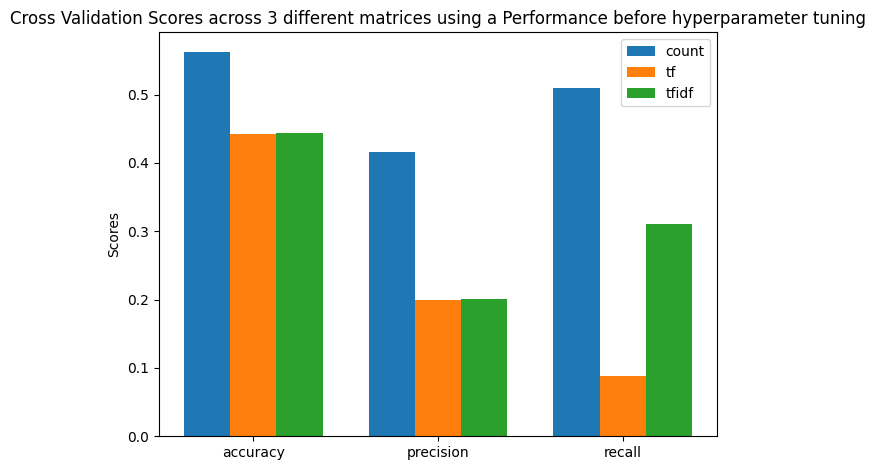

In [10]:
matrices = [new_count_matrix, new_tf_matrix, new_tfidf_matrix]
matrices_names = ['count', 'tf', 'tfidf']
tmu.plot_avg_performance_for_3matrices(clf, 'Performance before hyperparameter tuning',
matrices, matrices_names, y)

In [10]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier(random_state=1)
dt_params = {
'criterion': ['gini', 'entropy'],
'max_depth': range(3, 11),
'min_samples_leaf': range(3, 10),
'min_samples_split': range(3, 10),
'min_impurity_decrease': [0.01, 0.02, 0.03]
}
dt_grid_search = GridSearchCV(dt_clf, param_grid=dt_params)
dt_grid_search.fit(count_anova_matrix, y)
print(dt_grid_search.best_params_)
print(dt_grid_search.best_estimator_)
print(dt_grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 3, 'min_samples_split': 3}
DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       min_impurity_decrease=0.01, min_samples_leaf=3,
                       min_samples_split=3, random_state=1)
0.4593234360271423


In [11]:
dt_results = pd.DataFrame(dt_grid_search.cv_results_)
dt_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027705,0.020552,0.003598,0.003713,gini,3,0.01,3,3,"{'criterion': 'gini', 'max_depth': 3, 'min_imp...",0.441571,0.446559,0.432406,0.441923,0.445583,0.441609,0.005002,1961
1,0.015506,0.001500,0.001801,0.000400,gini,3,0.01,3,4,"{'criterion': 'gini', 'max_depth': 3, 'min_imp...",0.441571,0.446559,0.432406,0.441923,0.445583,0.441609,0.005002,1961
2,0.014304,0.002888,0.001400,0.000490,gini,3,0.01,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_imp...",0.441571,0.446559,0.432406,0.441923,0.445583,0.441609,0.005002,1961
3,0.015302,0.003200,0.001601,0.000491,gini,3,0.01,3,6,"{'criterion': 'gini', 'max_depth': 3, 'min_imp...",0.441571,0.446559,0.432406,0.441923,0.445583,0.441609,0.005002,1961
4,0.013800,0.000751,0.001302,0.000600,gini,3,0.01,3,7,"{'criterion': 'gini', 'max_depth': 3, 'min_imp...",0.441571,0.446559,0.432406,0.441923,0.445583,0.441609,0.005002,1961


In [15]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

svm_clf = LinearSVC(random_state=1)
svm_params = {
    'C': range(1, 6),
}
svm_grid_search = GridSearchCV(svm_clf, param_grid=svm_params)
svm_grid_search.fit(count_anova_matrix, y)
print(svm_grid_search.best_params_)
print(svm_grid_search.best_estimator_)
print(svm_grid_search.best_score_)


{'C': 5}
LinearSVC(C=5, random_state=1)
0.5301835096253047


In [16]:
svm_results = pd.DataFrame(svm_grid_search.cv_results_)
svm_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.371761,0.353592,0.005568,0.006445,1,{'C': 1},0.539400,0.520498,0.515373,0.535383,0.527086,0.527548,0.008944,2
1,4.281534,0.029285,0.002122,0.000214,2,{'C': 2},0.533057,0.514641,0.512201,0.538067,0.522694,0.524132,0.010083,5
2,4.436366,0.046155,0.001814,0.000408,3,{'C': 3},0.540376,0.518546,0.507565,0.538555,0.531479,0.527304,0.012500,3
3,4.682632,0.262501,0.001995,0.000015,4,{'C': 4},0.542327,0.519522,0.514885,0.532943,0.526354,0.527206,0.009728,4
4,6.790452,2.492141,0.002499,0.001052,5,{'C': 5},0.539888,0.518302,0.513909,0.548316,0.530503,0.530184,0.012877,1


In [17]:
nb_clf = ComplementNB()
nb_params = {
'alpha': [0, .1, .2, .3, .4, .75, 1],
'norm': [True, False]
}
nb_grid_search = GridSearchCV(nb_clf, param_grid=nb_params)
nb_grid_search.fit(count_anova_matrix, y)
print(nb_grid_search.best_params_)
print(nb_grid_search.best_estimator_)
print(nb_grid_search.best_score_)

{'alpha': 1, 'norm': False}
ComplementNB(alpha=1)
0.4923628839230509


In [18]:
nb_results = pd.DataFrame(nb_grid_search.cv_results_)
nb_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_norm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018309,0.007789,0.001403,0.000488,0,True,"{'alpha': 0, 'norm': True}",0.501098,0.479746,0.475598,0.497316,0.490727,0.488897,0.009836,12
1,0.011907,0.000499,0.001599,0.000491,0,False,"{'alpha': 0, 'norm': False}",0.484508,0.483163,0.496340,0.506833,0.490727,0.492314,0.008651,2
2,0.015510,0.001820,0.001796,0.000412,0.1,True,"{'alpha': 0.1, 'norm': True}",0.501342,0.479502,0.475598,0.497316,0.490727,0.488897,0.009942,13
3,0.014918,0.002622,0.001791,0.000397,0.1,False,"{'alpha': 0.1, 'norm': False}",0.484508,0.483163,0.496340,0.506833,0.490727,0.492314,0.008651,2
4,0.012600,0.002333,0.001601,0.000489,0.2,True,"{'alpha': 0.2, 'norm': True}",0.501342,0.479502,0.475598,0.497316,0.490727,0.488897,0.009942,13


In [19]:
optimal_dt = DecisionTreeClassifier(max_depth=3, min_impurity_decrease=0.01,
min_samples_leaf=3, min_samples_split=3, random_state=1)
optimal_svm = LinearSVC(C=5, random_state=1)
optimal_nb = ComplementNB(alpha=0.3, norm=True)
tmu.printClassifReport(optimal_dt, count_anova_matrix, y)
tmu.printClassifReport(optimal_svm, count_anova_matrix, y)
tmu.printClassifReport(optimal_nb, count_anova_matrix, y)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1421
           2       0.00      0.00      0.00      1793
           3       0.00      0.00      0.00      2184
           4       0.29      0.27      0.28      6039
           5       0.50      0.82      0.62      9054

    accuracy                           0.44     20491
   macro avg       0.16      0.22      0.18     20491
weighted avg       0.31      0.44      0.36     20491

              precision    recall  f1-score   support

           1       0.54      0.58      0.56      1421
           2       0.38      0.15      0.22      1793
           3       0.39      0.10      0.16      2184
           4       0.43      0.31      0.36      6039
           5       0.58      0.85      0.69      9054

    accuracy                           0.53     20491
   macro avg       0.46      0.40      0.40     20491
weighted avg       0.49      0.53      0.48     20491

              precisio

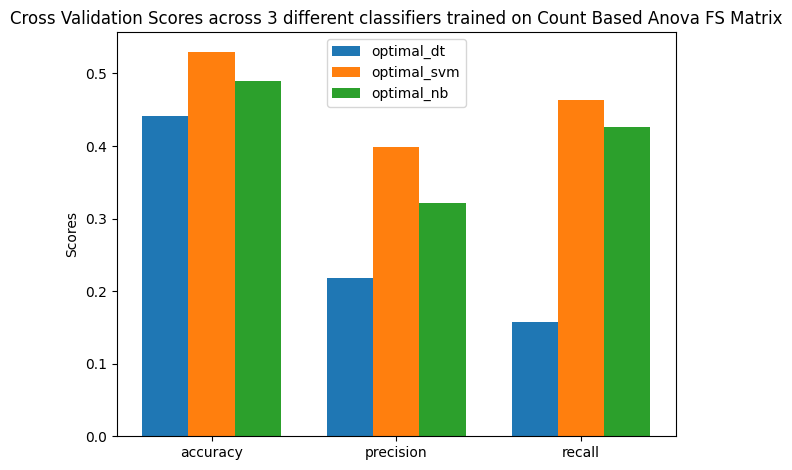

In [20]:
clfs = [optimal_dt, optimal_svm, optimal_nb]
clf_names = ['optimal_dt', 'optimal_svm', 'optimal_nb']
tmu.plot_avg_performance_across_3clfs(clfs, clf_names, count_anova_matrix,
'Count Based Anova FS Matrix', y)